# ASSIGNMENT 4

## import libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt

## PROBLEMS 1

### ex1

In [55]:
def function(x):
    x1,x2 = x
    return (x1**2) + 2*(x2**2)

### ex2

In [56]:
def gradient(x):
    x1,x2 = x
    df_x1 = 2*x1
    df_x2 = 4*x2
    return np.array([df_x1,df_x2])

### ex3

In [57]:
x0 = [9,1]
f = function(x0)
g = gradient(x0)

print(f'function at x0 = (9,1) : {f}')
print(f' at x0 = (9,1) : {g}')

function at x0 = (9,1) : 83
 at x0 = (9,1) : [18  4]


### ex4

In [58]:
def compute_update(xk,alpha,d):
    return xk + alpha*d 

def wolfe_1(function,gradient,x,alpha,d,n):
    return function(compute_update(x,alpha,d)) <= function(x) + n*alpha * np.dot(gradient(x).T,d)

def wolfe_2(gradient,x,alpha,d,n_bar):
    return np.dot(gradient(compute_update(x,alpha,d)).T,d) >= n_bar*np.dot(gradient(x).T,d)

def wolfe_conditions(function,gradient,x,d,alpha,n,n_bar):
    return (wolfe_1(function,gradient,x,alpha,d,n),wolfe_2(gradient,x,alpha,d,n_bar))
    

### ex5

In [59]:
x0 = np.array([9,1])
d = -gradient(x0)
alpha = 0.05
n = 0.01
n_bar = 0.8
wolfe_conditions(function,gradient,x0,d,alpha,n,n_bar)

(True, False)

### ex6

In [60]:
def backtracking(function,gradient,x,d,alpha,n):
    while not wolfe_1(function,gradient,x,alpha,d,n):
        alpha *= 0.5
    new_x = compute_update(x, alpha,d)
    return alpha,new_x

### ex7

In [61]:
x0 = np.array([9,1])
d = -gradient(x0)
alpha = 10
n = 0.01
backtracking(function,gradient,x0,d,alpha,n)

(0.625, array([-2.25, -1.5 ]))

## PROBLEMS 2

In [62]:
def f(x):
    x1,x2 = x
    return x1**3 - x1 + x2**3 - x2

def gradient_f(x):
    x1,x2 = x
    df_x1 = 3*(x1**2) - 1
    df_x2 = 3*(x2**2) - 1
    return np.array([df_x1,df_x2])

def hessian_f(x):
    x1,x2 = x
    d2f_x1 = 6*x1
    d2f_x2 = 6*x2
    d2f_x1x2 = 0
    d2f_x2x1 = 0
    return np.array([[d2f_x1, d2f_x1x2],[d2f_x2x1, d2f_x2]])

### GRADIENT DESCENT

In [63]:
def gradient_descent(x0, alpha=0.1, tol=1e-6, max_iters=1000):
    x = np.array(x0, dtype=float)
    iter = 0
    for k in range(max_iters):
        grad = gradient_f(x)
        norm_grad = np.linalg.norm(grad)
        iter += 1
        # NOTE : check if slope is almost flat
        if norm_grad < tol:
            break
        
        x -= alpha * grad
    return x,iter

### GRADIENT DESCENT BACKTRACKING

In [64]:
def gradient_descent_backtracking(x0, alpha=0.5, tol=1e-6, max_iters=1000):
    x = np.array(x0, dtype=float)
    iter = 0
    for k in range(max_iters):
        grad = gradient_f(x)
        # NOTE: direction is negative hence + later
        d =-grad
        n = 0.01
        alpha,new_x = backtracking(f,gradient_f,x,d,alpha,n)
        x += alpha * d
        iter += 1
        norm_grad = np.linalg.norm(grad)
        # NOTE : check if slope is almost flat
        if norm_grad < tol:
            break
        
    return x,iter

### NEWTON METHOD

In [65]:
def newton_method_backtracking(x0, alpha=0.5, tol=1e-6, max_iters=100):
    x = np.array(x0, dtype=float)
    for i in range(max_iters):
        grad = gradient_f(x)
        hessian = hessian_f(x)
        # NOTE: direction is negative hence + later
        d = -np.linalg.solve(hessian, grad)
        alpha,new_x = backtracking(f,gradient_f,x,d,alpha,n=0.01)
        x += alpha *d
        norm_grad = np.linalg.norm(grad)
        # NOTE : check if slope is almost flat
        if norm_grad < tol:
            return x, i
        
    return x, max_iters

### RESULTS

In [66]:
x0 = np.array([1,1])
g_desc = gradient_descent(x0)
g_desc_backtracking = gradient_descent_backtracking(x0)
newton_backtracking = newton_method_backtracking(x0)

print(f' gradient descent with alpha=0.1 : {g_desc}')
print(f' gradient descent with backtracking : {g_desc_backtracking}')
print(f' Newton Method with backtracking : {newton_backtracking}')

 gradient descent with alpha=0.1 : (array([0.57735041, 0.57735041]), 35)
 gradient descent with backtracking : (array([0.57735026, 0.57735026]), 9)
 Newton Method with backtracking : (array([0.57735036, 0.57735036]), 22)


## PROBLEMS 3

### ex1

In [67]:
def forward_finite_difference(f,x,t):
    return ((f(x+t) - f(x))/t)

### ex2

In [68]:
def f(x):
    return np.sin(x)

def compute_derivative(x):
    return np.cos(x)

### ex3

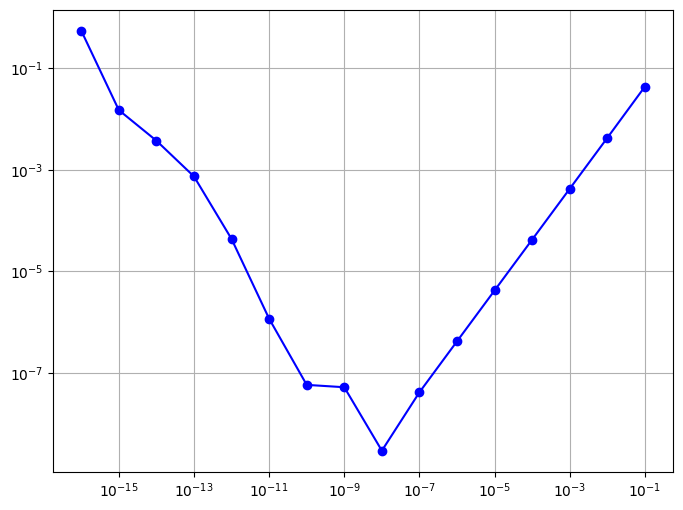

In [69]:
arr = [i for i in range(16, -1, -1)]
arr.pop()

err_arr = []

for elem in arr :
    approx = forward_finite_difference(f, 1, 10**(-elem))
    err = abs(compute_derivative(1) - approx)
    err_arr.append(err)

error = np.array(err_arr) 

t_values = np.logspace(-16, -1, num=16)

plt.figure(figsize=(8, 6))
plt.loglog(t_values, err_arr, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.show()

### ex4

In [70]:
def central_difference_formula(f,x,t):
    return (f(x+t) - f(x-t)) / (2*t) 

### ex5

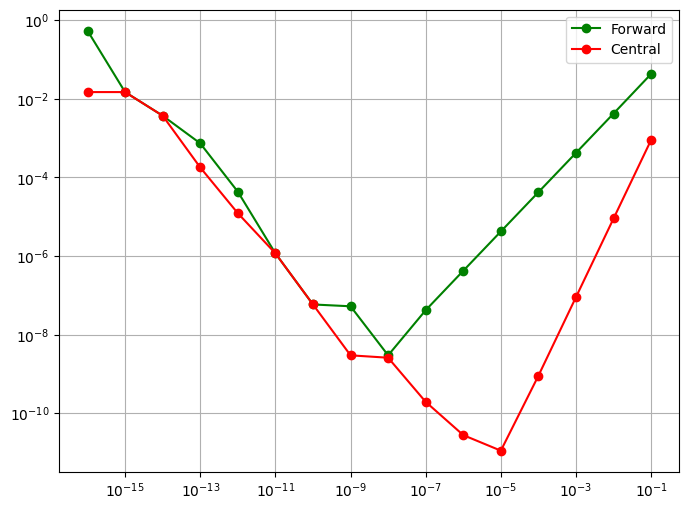

In [71]:
arr = [i for i in range(16, -1, -1)]
arr.pop()

err_arr_central = []

for elem in arr:
    approx = central_difference_formula(f,1,10**(-elem))
    err = abs(compute_derivative(1) - approx)
    err_arr_central.append(err)

error = np.array(err_arr_central) 
t_values_central = np.logspace(-16, -1, num=16)

plt.figure(figsize=(8, 6))
plt.loglog(t_values, err_arr, marker='o', linestyle='-', color='g', label='Forward')  
plt.loglog(t_values_central, err_arr_central, marker='o', linestyle='-', color='r', label='Central') 
plt.legend()
plt.grid(True)
plt.show()

Even though the central difference formula is computationally more expensive it is clearly possible to see how the error is much smaller than the forward one, hence it is more precise. 